# import liberies

In [114]:
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# load Data

In [115]:
df = pd.read_csv("/home/ellah/Desktop/Breast_canser.csv/Breast_Cancer.csv",sep=",")
df.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# catagory

diagnosis
B    357
M    212
dtype: int64

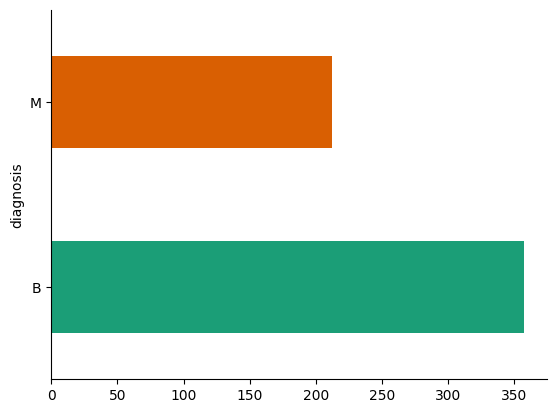

In [116]:
df.groupby('diagnosis').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

df.groupby('diagnosis').size()

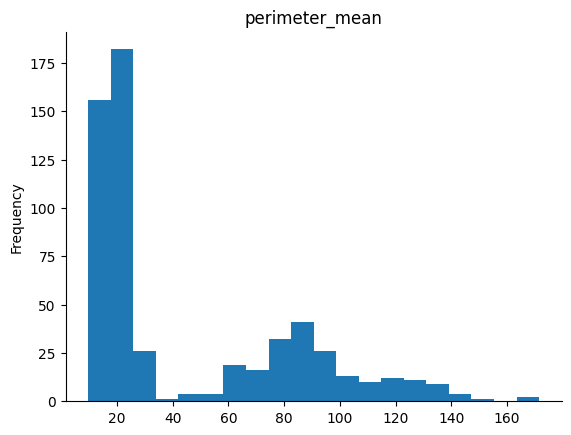

In [117]:
df['perimeter_mean'].plot(kind='hist', bins=20, title='perimeter_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Explore data

In [118]:
print (df.shape)

print (df.head(10))
print (df.tail())
print(df.describe())
print(df.groupby('diagnosis').size())

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760       

# visualization

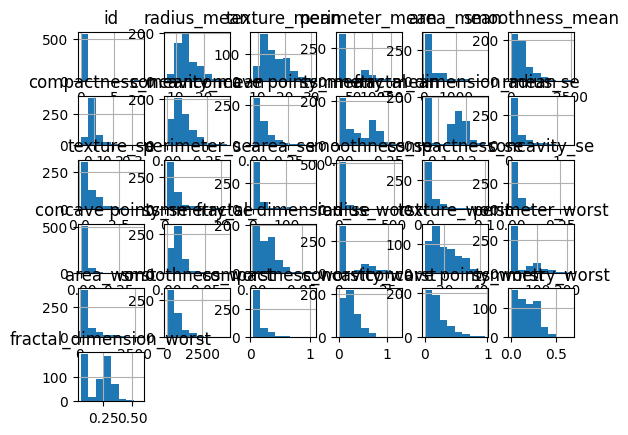

In [136]:
df.hist(bins=8)
plt.show()

# missing values

In [120]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# predicting data

In [121]:
array = df.values
X = array[:,0:4]
y = array[:,4]

#print (X)
#print (y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print confirmation
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (455, 4)
Test data shape: (114, 4)


# model creation and training

In [123]:
Y_train = Y_train.astype(int)

In [124]:
import pandas as pd

data = pd.read_csv('/home/ellah/Desktop/Breast_canser.csv/Breast_Cancer.csv')  # or wherever your data is


In [ ]:
X_full = data.drop('diagnosis', axis=1)  
Y_full = data['diagnosis']


In [126]:
print(X_full.dtypes)
print(Y_full.head())


id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [127]:
X_full_encoded = pd.get_dummies(X_full)  # encodes all categorical features automatically


In [128]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_full_encoded = label_encoder.fit_transform(Y_full)


In [129]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)


In [130]:
import pandas as pd
import numpy as np

# Step 1: Convert Y_validation to Series to use .isin()
Y_validation_series = pd.Series(Y_validation)

# Step 2: Create boolean mask for common labels
common_labels = set(Y_train) & set(Y_validation_series)
mask = Y_validation_series.isin(common_labels)

# Step 3: Use mask.to_numpy() to avoid index mismatch errors
X_validation_filtered = X_validation[mask.to_numpy()]
Y_validation_filtered = Y_validation_series[mask].to_numpy()


In [131]:
print(type(X_validation))  # DataFrame or ndarray?
print(type(Y_validation))  # Should be Series or ndarray
print(mask.index)          # Index of your boolean mask
print(X_validation.shape)  # Rows to make sure it matches


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=114, step=1)
(114, 4)


In [132]:
import pandas as pd
import numpy as np

# Convert Y_validation (NumPy array) to a Pandas Series
Y_validation_series = pd.Series(Y_validation)

# Get common labels between training and validation labels
common_labels = set(Y_train) & set(Y_validation_series)

# Create a mask for rows with labels in both training and validation
mask = Y_validation_series.isin(common_labels)

# Apply mask to both X_validation and Y_validation
X_validation_filtered = X_validation[mask.to_numpy()]  # use mask as NumPy array
Y_validation_filtered = Y_validation_series[mask].to_numpy()


In [ ]:
predictions = model.predict(X_validation_filtered)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(Y_validation_filtered, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_validation_filtered, predictions))
print("Classification Report:\n", classification_report(Y_validation_filtered, predictions))


Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       3.0
          13       0.00      0.00      0.00       5.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       8.0
          16       0.00      0.00      0.00       5.0
          17       0.00      0.00      0.00       4.0
          18       0.00      0.00      0.00      10.0
          19       0.00      0.00      0.00       8.0
          20       0.00      0.00      0.00       6.0
          21       0.00      0.00      0.00       7.0
          22

/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop the 'id' column
df = df.drop('id', axis=1)

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features and target
X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)  # all numeric features
y = df['diagnosis_encoded']  # target labels (0/1)

# Check the data types to be sure all are numeric
print(X.dtypes)

# Now split train and validation sets, for example:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can train your SVM model
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_validation)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))



radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Exploring model svm

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = []
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('=======================')
    print(name)
    print(cv_results)
    print(f'{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})')


/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater t

SVM
[0.04347826 0.08695652 0.08695652 0.08695652 0.08695652 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667]
SVM: 0.072464 (0.013595)


/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
